In [ ]:
#@title [Candidature form]

Name = '' #@param {type: "string"}
Matriculation_number = '' #@param {type:"string"}
Faculty = ''  #@param {type: "string"}
Course = '' #@param {type:"string"}
Current_semester = "" #@param ["1", "2", "3", "4", "5", "6", "7"] {allow-input: true}

# The Perceptron 
## Machine Learning Project - 02 
This project is created and adapted as a Jupyter notebook for [**MME 26849: "Fundamentals of Deep Learning and TinyML"**](https://felix.hs-furtwangen.de/url/RepositoryEntry/4020862983) by the course instructors [Marcus Rüb](https://linkedin.com/in/marcus-rüb-3b07071b2) and [Ajay Krishna](https://linkedin.com/in/ajay-krishna-2031a5119).

## Resouces
Slide from lecture:
[03 - The Perceptron](https://github.com/r1marcus/Fundamentals-of-Deep-Learning-HFU/blob/main/Slides/03%20-%20The%20Perceptron/The%20Perceptron.pptx)

## Goal of the project
Implementation of the classic Perceptron by [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) for binary classification.


## What is a Perceptron? 

Similar to how atoms are the building blocks of matter and how microprocessors are the building blocks of a computer, perceptrons are the building blocks of Neural Networks.

If you look closely, you might notice that the word “perceptron” is a combination of two words:

*   **Perception** (noun) the ability to sense something.
*   **Neuron** (noun) a nerve cell in the human brain that turns sensory input into meaningful information.

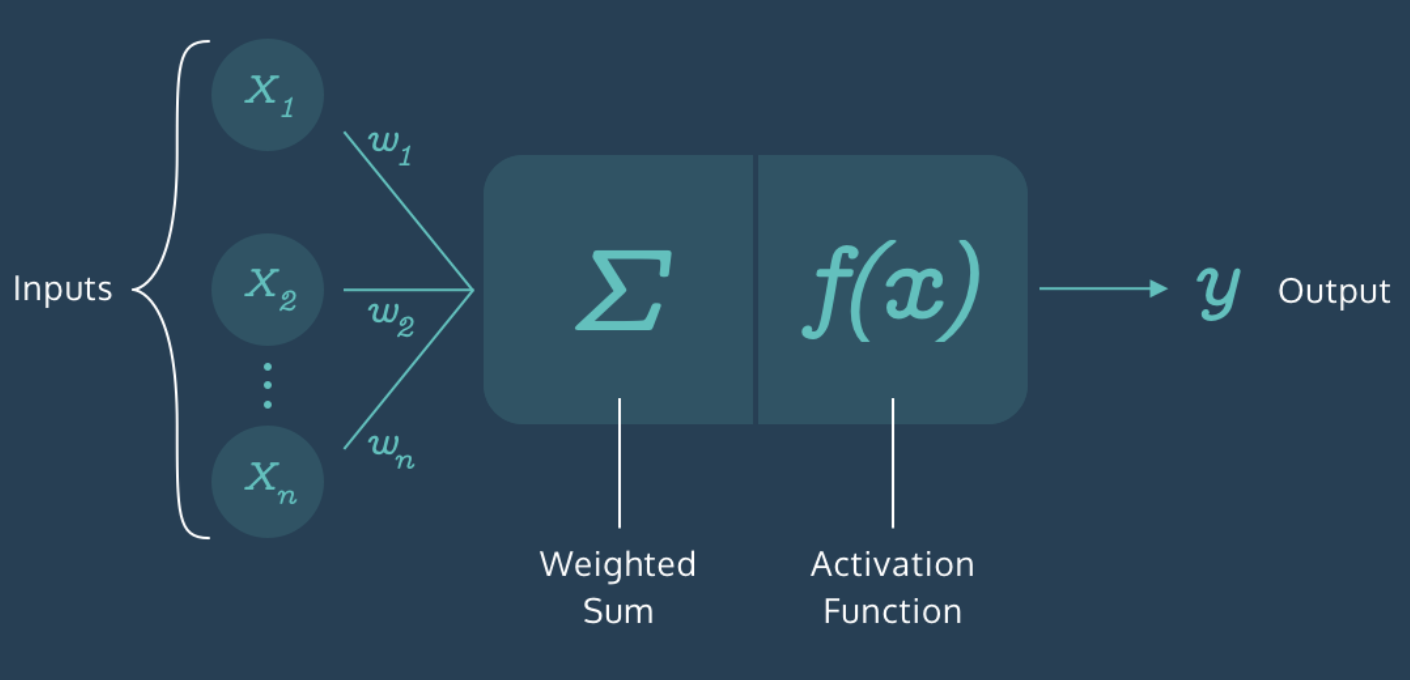

Therefore, the perceptron is an artificial neuron that simulates the task of a biological neuron to solve problems through its own “sense” of the world. Although the perceptron comes with its own artificial design and set of parameters, at its core, a single perceptron is trying to make a simple decision.

Let’s take the example a simple self-driving car that is based on a perceptron. If there’s an obstacle on the left, the car would have to steer right. Similarly, if there’s an obstacle on the right, the car would have to steer left.

For this example, a perceptron could take the position of the obstacle as inputs, and produce a decision — left turn or right turn — based on those inputs.

And here’s the cool part — the perceptron can correct itself based on the result of its decision to make better decisions in the future!

Of course, the real world scenario isn’t that simple. But if you combine a bunch of such perceptrons, you will get a neural network that can even make better decisions on your behalf!

## Import libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

The toy data for our exercise can be found at: https://s3.amazonaws.com/tomslee-airbnb-data-2/frankfurt.zip

We will be using the .txt file with binary classes (0/1) in our project.

Steps for loading data:

    1. Press the above link "https://s3.amazonaws.com/tomslee-airbnb-data-2/frankfurt.zip"
    2. Unzip/extract the data to your local machine (It should consist of a .txt file).
    3. Press the folder icon on the left in the Colab window and upload "perceptron_toydata.txt" from the unzipped file.

In [ ]:

##########################
### DATASET
##########################

data = np.genfromtxt('perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


## Training set

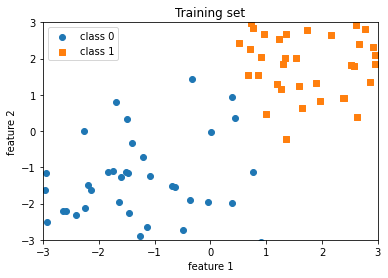

In [ ]:
plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

## Test set

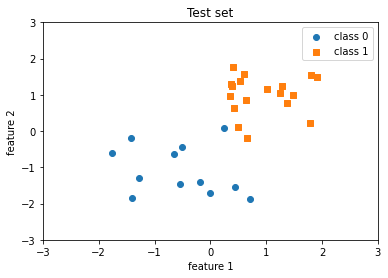

In [ ]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

## Defining the Perceptron model

In [ ]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float)
        self.bias = np.zeros(1, dtype=np.float)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

## Training the Perceptron

In [ ]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=5)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)

Model parameters:


  Weights: [[1.27340847]
 [1.34642288]]

  Bias: [-1.]



## Evaluating the model

In [ ]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


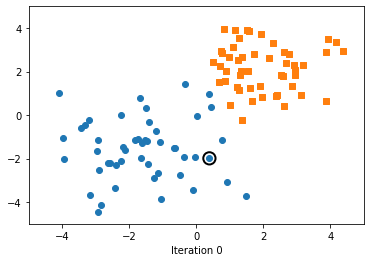

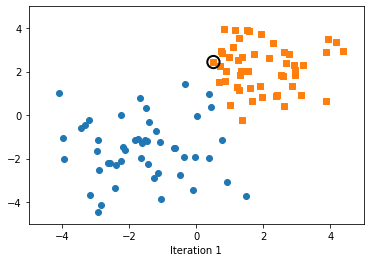

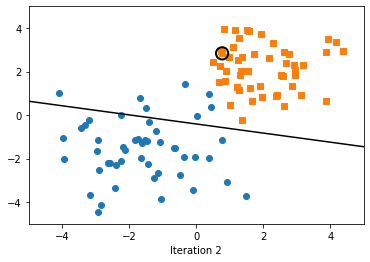

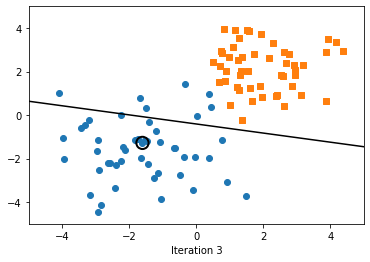

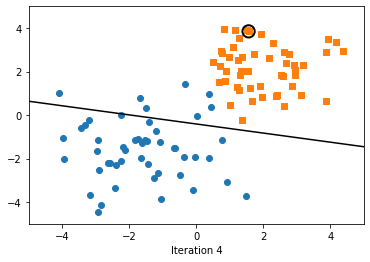

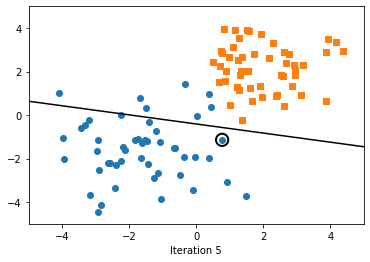

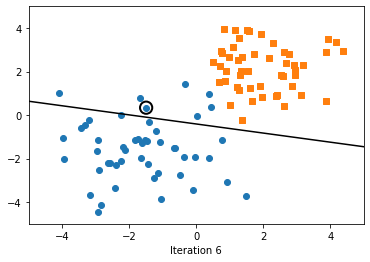

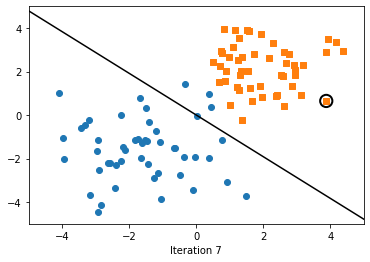

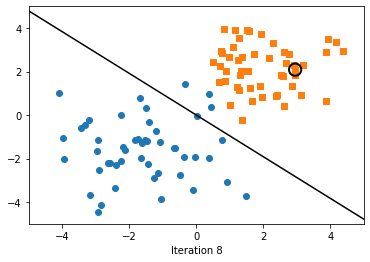

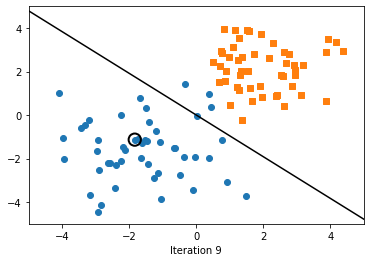

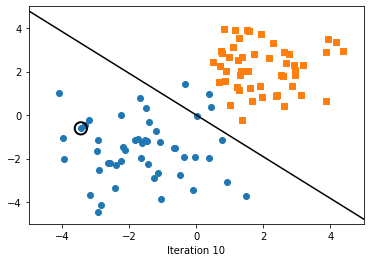

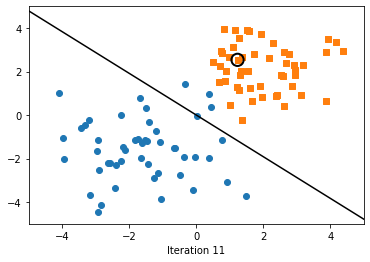

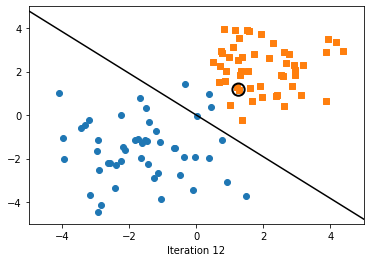

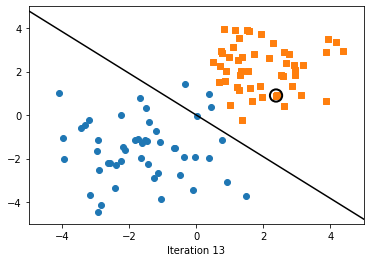

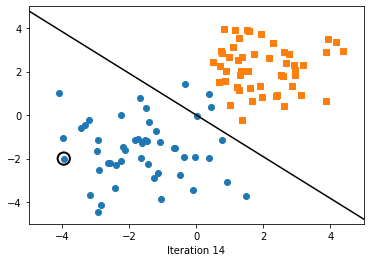

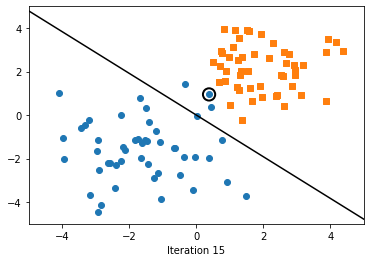

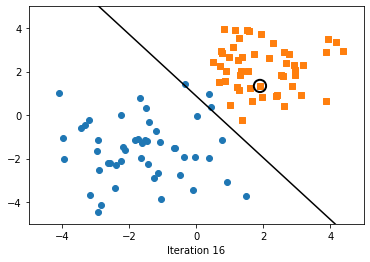

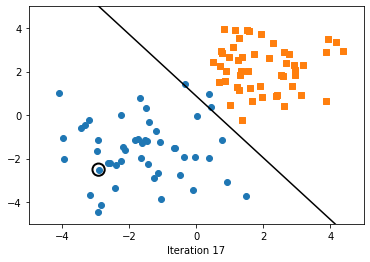

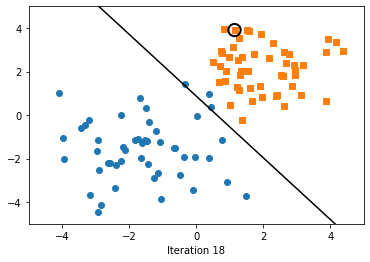

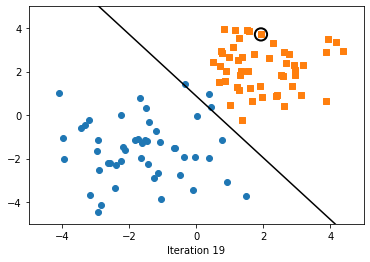

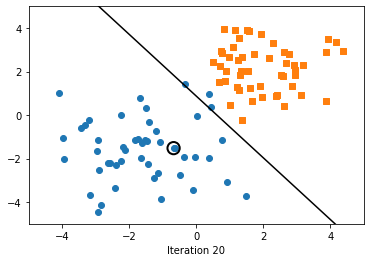

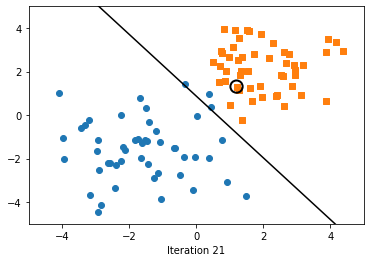

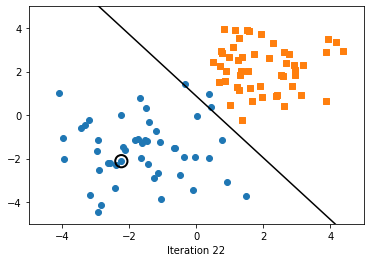

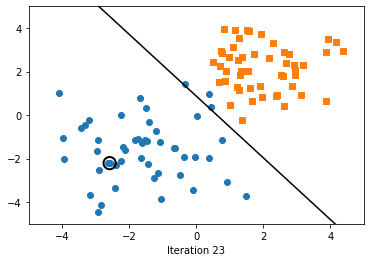

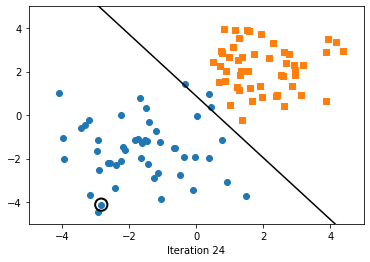

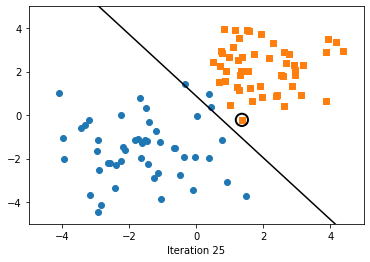

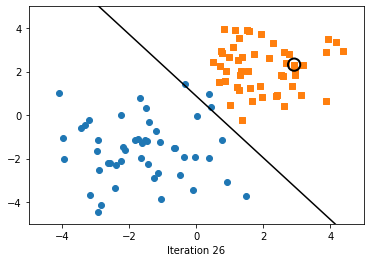

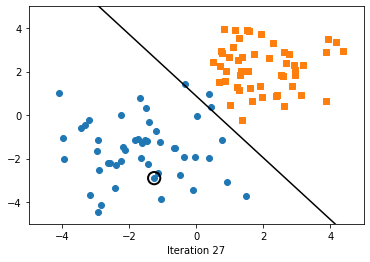

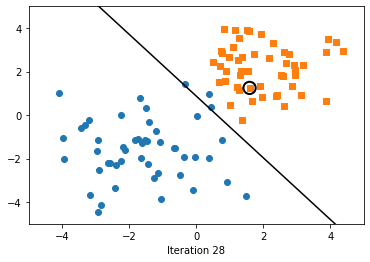

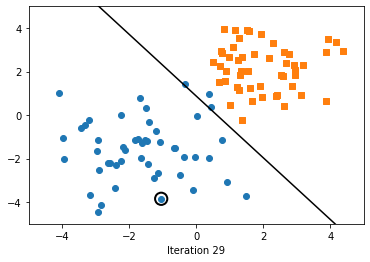

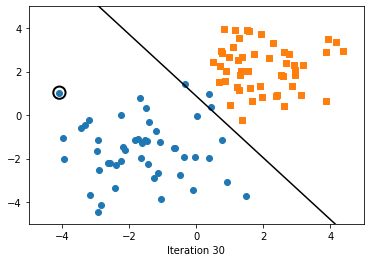

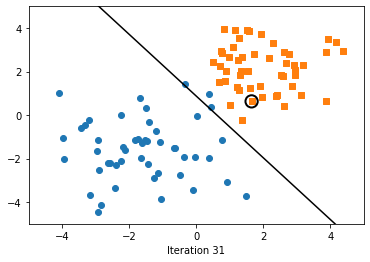

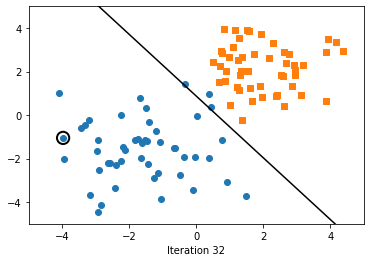

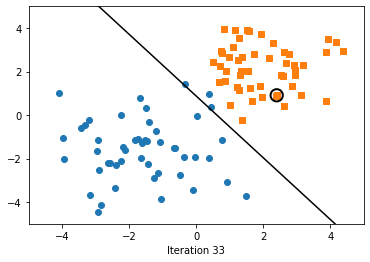

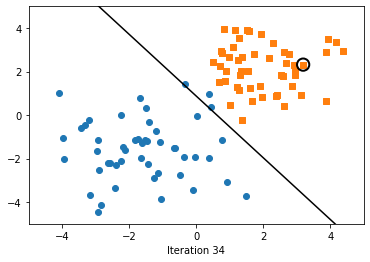

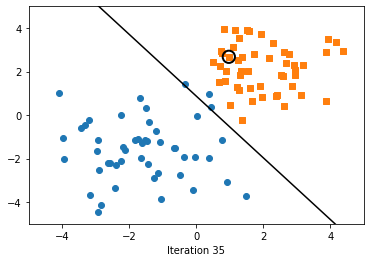

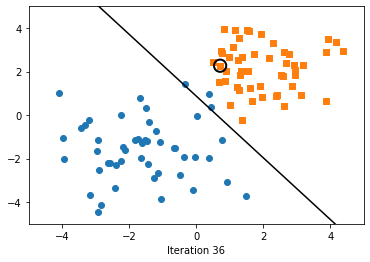

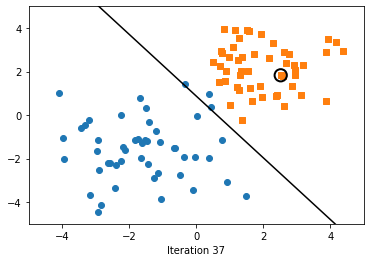

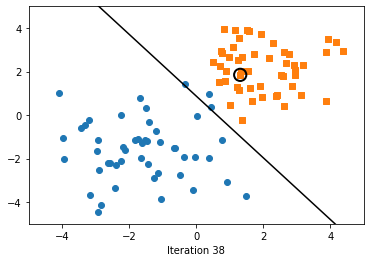

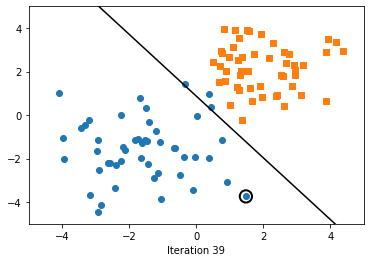

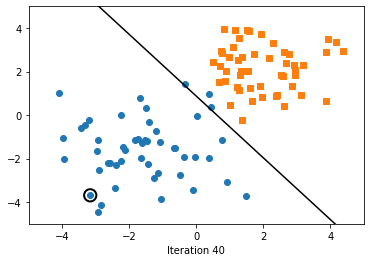

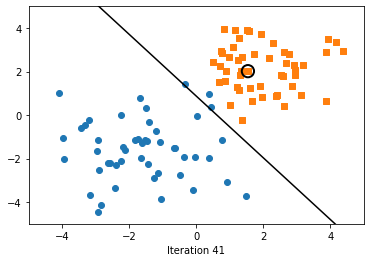

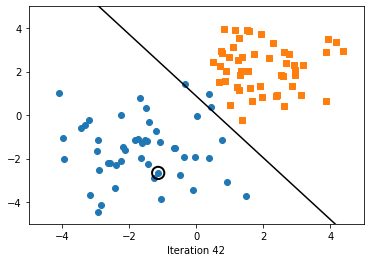

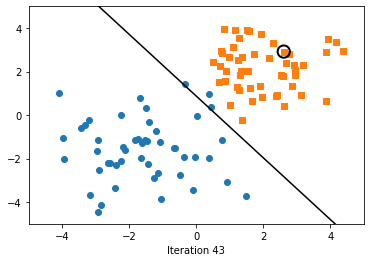

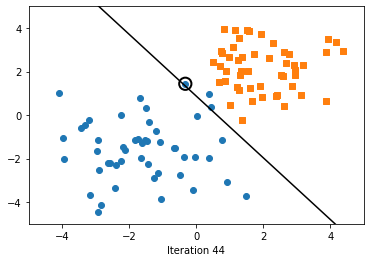

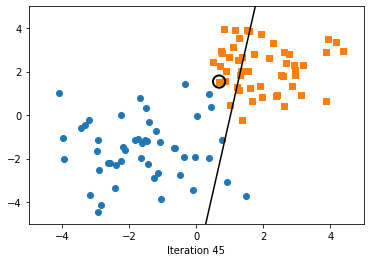

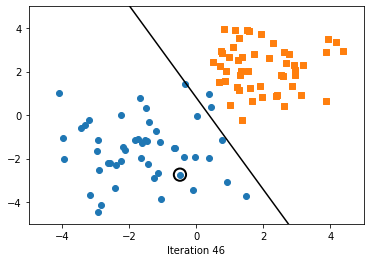

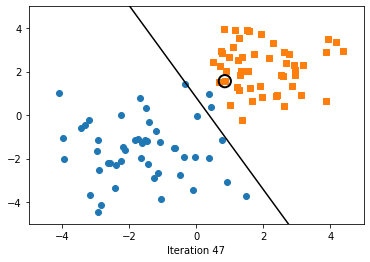

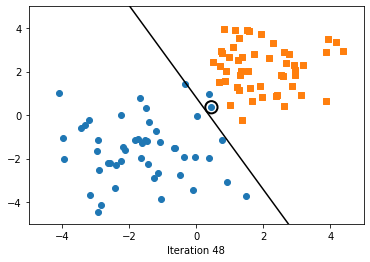

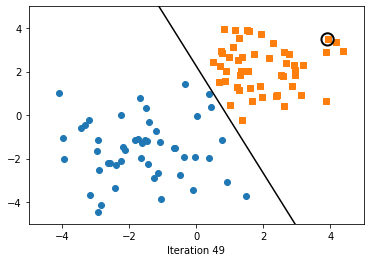

In [ ]:
#########################################
### 2D Decision Boundary (with animation)
#########################################


import imageio


scatter_highlight_defaults = {'c': '',
                              'edgecolor': 'k',
                              'alpha': 1.0,
                              'linewidths': 2,
                              'marker': 'o',
                              's': 150}

def plot(i):
    
    fig, ax = plt.subplots()
    w, b = all_weights[i], all_biases[i]
    
    x_min = -20
    y_min = ( (-(w[0] * x_min) - b[0]) 
              / w[1] )

    x_max = 20
    y_max = ( (-(w[0] * x_max) - b[0]) 
              / w[1] )
    
    ax.set_xlim([-5., 5])
    ax.set_ylim([-5., 5])
    
    ax.set_xlabel('Iteration %d' % i)

    ax.plot([x_min, x_max], [y_min, y_max], color='k')
    
    ax.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
    ax.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')
    
    ax.scatter(X[i][0], X[i][1], **scatter_highlight_defaults)

    fig.canvas.draw();
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('training.gif', [plot(i) for i in range(len(all_weights))], fps=1);